# Big mart Sales Price Prediction

## Abstract : The Data is related with BigMart Sales in 2013.This is a regression problem where we will try to predict Sales of each product store wise. 

Attribute Information : 
* Item_Identifier - Unique Product Id
* Item_Weight - Weight of product
* Item_Fat_Content - Whether the item is low fat or not
* Item_visibility - The percentage of total display area of all products in a store allocated to a particular product
* Item_type - The category to which the product belongs
* Item_MRP - Maximum retail price of the product
* Outlet_Identifier - Unique store ID
* Outlet_Establishment_Year - The year in which store was established
* Outlet_Size - The size of the store in terms of ground area covered
* Outlet_Location_Type - The type of city in which store is located
* Outlet_Type - Whether the Outlet is grocery store or some sort of Supermarket
* Item_Outlet_Sales - Sales of the product in the particular store.This is the target variable.

# Importing Necessary libraries

In [174]:
#library used for data manipulation and analysis
import pandas as pd
# library used for working with arrays.
import numpy as np
# library for plots and visualisations
import matplotlib.pyplot as plt
# library for visualisations
import seaborn as sns
%matplotlib inline 
# to restrict the float value to 2 decimal places
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [175]:
# reading the data

train  = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)

In [176]:
# getting the top 10 rows of the concatenated data

data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [177]:
# Getting the last 10 rows of the data 

data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14194,FDA01,15.00,reg,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
14196,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14197,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14198,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [178]:
# shape of the Dataset

data.shape

(14204, 13)

We have 14204 rows and 13 columns in the dataset.(1 added to identifying train and test data,originally 12 columns)

In [179]:
# Checking about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

* Data has float,int and object values.
* We can observe that there are some columns in the dataset where we have missing values.

In [180]:
# Checkign for null values in each column

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

* There are missing values in the Item_Weight column and Outlet_Size column
* Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it.
* We will impute values in the Item_Weight column and Outlet_Size column.

In [181]:
# Data Description

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


* By looking at the 75% and max value we can say that there are outliers present in the many columns of dataset where there is large gap between these two values.
* Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
* Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.


In [182]:
# Checking unique values in the dataset columns

data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

* Item_Type has 16 unique values.
* Item_Fat_Content  has 5 Unique values,other columns seems to be ok.(as expected)

In [183]:
# Checking duplicate values 

value=len(data[data.duplicated()])
print(value)

0


There are no duplicate values in the dataset.

In [184]:
# We will check the frequency of values in the categorical columns.

data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

There are some changes need to be done in the Item_Fat_Content column as some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

In [185]:
# Changing categories in the Item_Fat_Content column.
data["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

# Checking the changes
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [186]:
# Item_Type column

data["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Not all categories have substantial numbers. It looks like combining them can give better results.


We will identify Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column

In [187]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [188]:
# Outlet_Type column

data["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

* Supermarket Type2 and Type3 can be combined

* we decided to consider combining the Supermarket Type2 and Type3 variables. But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store. If they have similar sales, then keeping them separate won’t help much.

In [189]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558



This shows significant difference between them and we’ll leave them as it is.

In [190]:
# Outlet_Location_Type column

data["Outlet_Location_Type"].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [191]:
# Outlet_Size column

data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

# Imputing Missing Values 

In [192]:
# Item_Weight Column will be imputed with mean value of the column

avg_Item_Weight = round((data["Item_Weight"].mean()),2)
data["Item_Weight"] = data["Item_Weight"].fillna(avg_Item_Weight)


In [193]:
data["Item_Weight"].isnull().sum()

0

In [194]:
# Outlet_Size column

data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)



In [195]:
data["Outlet_Size"].isnull().sum()

0

In [196]:
# Verifying for null values 

data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
dtype: int64

# Feature Engineering 

* Modify Item_Visibility column

* We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.


In [197]:
# Determine average visibility of a product

visibility_avg = round((data["Item_Visibility"].mean()),6)

# imputing 0 value with mean value

data["Item_Visibility"] = np.where(data["Item_Visibility"] == 0, visibility_avg,data["Item_Visibility"])


In [198]:
data["Item_Visibility"].describe()

count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

# Making a new column depicting the years of operation of a store. 

In [199]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

This shows stores which are 4-28 years old

## we saw there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [200]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Exploratory Data Analysis

In [201]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# Analysis on Categorical columns

In [202]:
categorical = data.select_dtypes(include = ["object"])
print(categorical.shape[1],"categorical features in the Dataset")
categorical.columns

9 categorical features in the Dataset


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source',
       'Item_Type_Combined'],
      dtype='object')

* 'Item_Identifier','Outlet_Identifier' are just id , dont have any relation with the sales
* 'Item_Type','source' are also irrelevant column with the context

### Item Fat Content

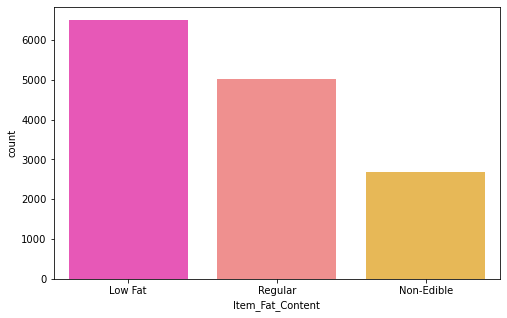

In [203]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="Item_Fat_Content", palette='spring')
plt.show()

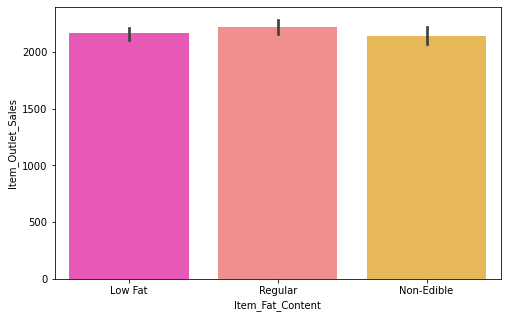

In [204]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=data,palette='spring')
plt.show()

* Low FAT products are bought more followed by Regular and Non Edible 
* But Item Outles sales are almost same for all Low Fat,Regular Item Content and Non-Edible.

### Item_Type_Combined

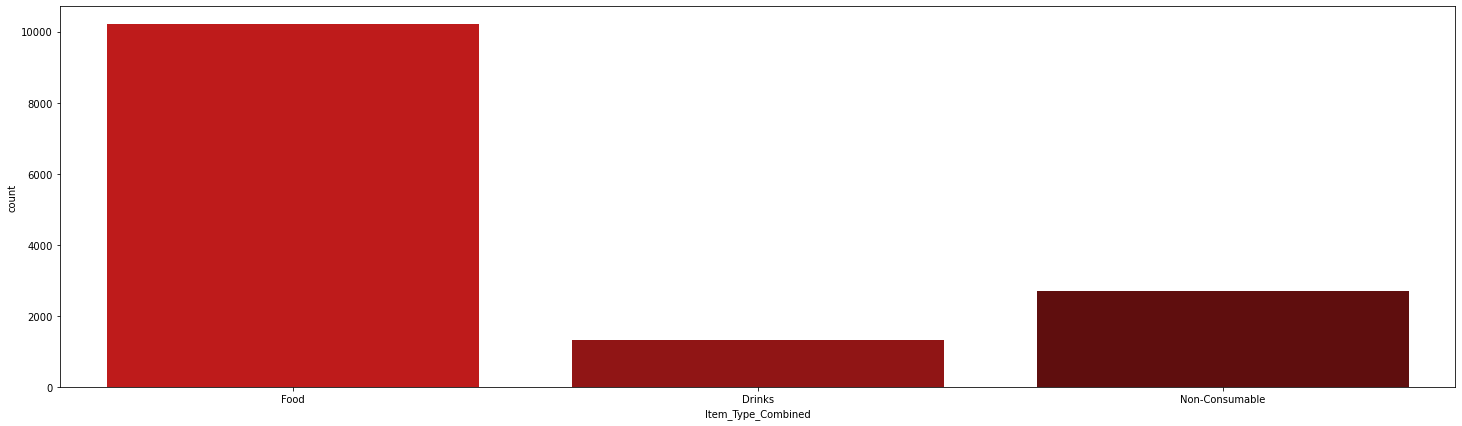

In [32]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type_Combined',data=data, palette='flag')
plt.show()

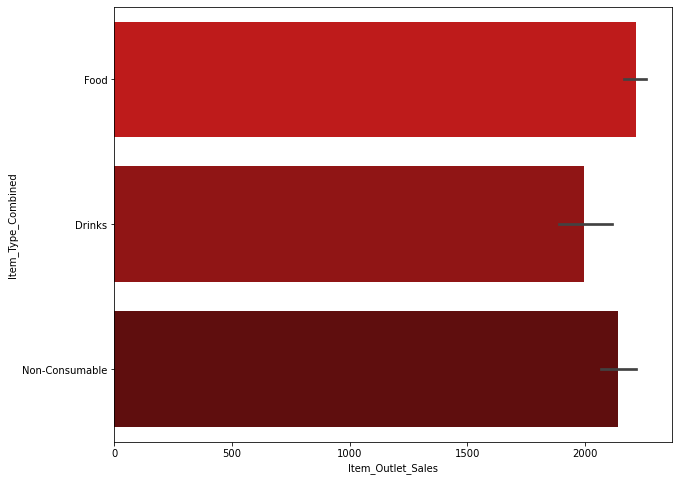

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type_Combined',x='Item_Outlet_Sales',data=data,palette='flag')
plt.show()

The product category of food is mostly available but the sales of Food ,Non consumable also along with Drinks seems high
hence the sales can be improved with having stock of products that are most bought by customers.

### Outlet Size

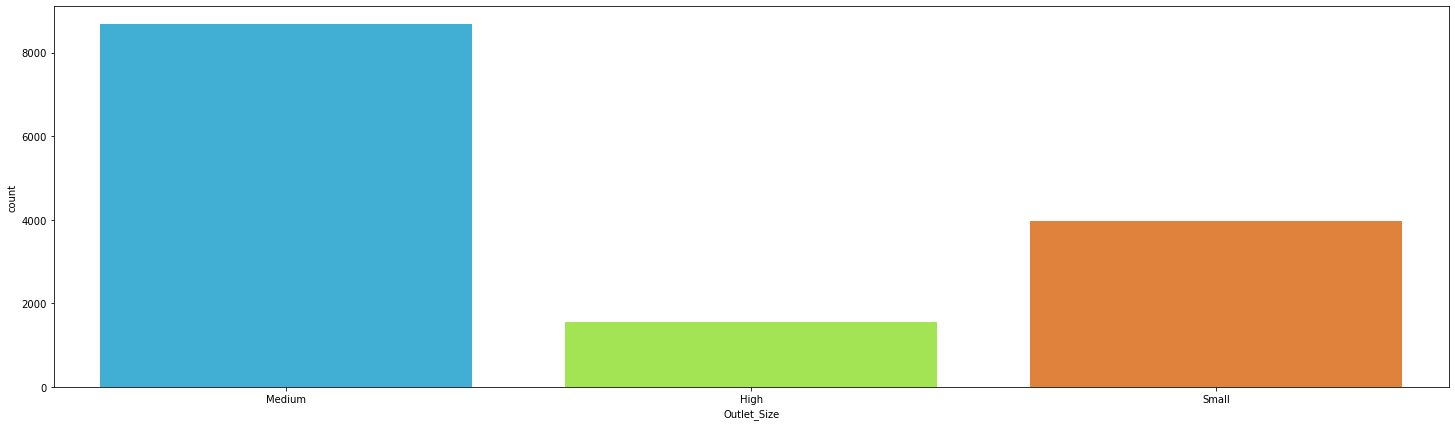

In [34]:
plt.figure(figsize=(25,7))
sns.countplot(x='Outlet_Size',data=data, palette='turbo')
plt.show()

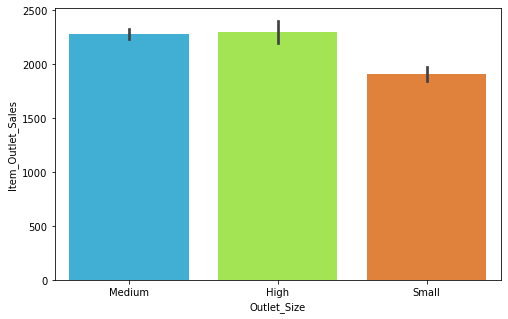

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='turbo')
plt.show()

* The Outlets are more of Medium Size
* But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

### Outlet Location Type

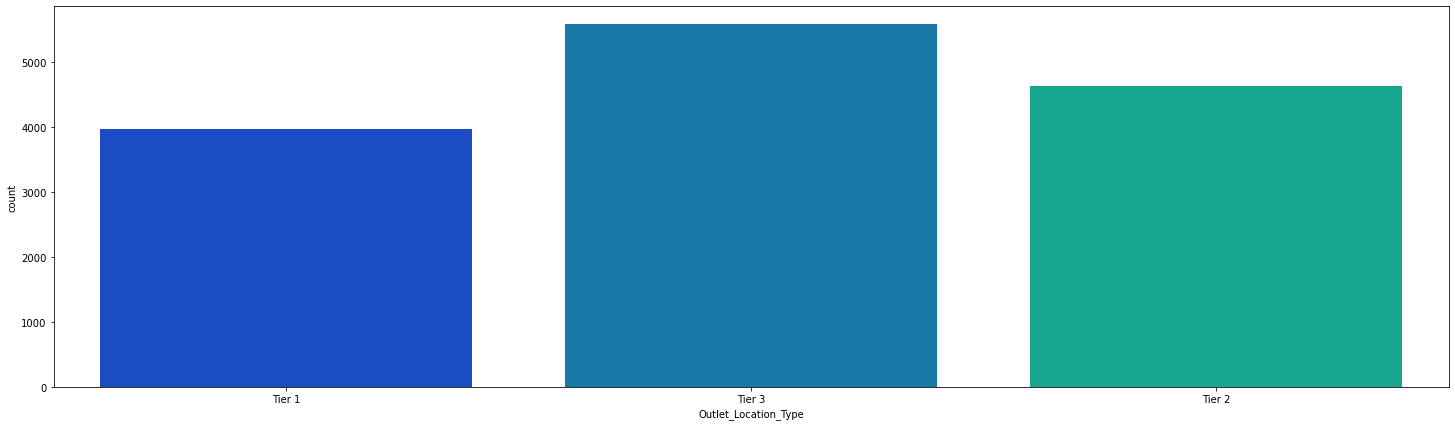

In [36]:
plt.figure(figsize=(25,7))
sns.countplot(x='Outlet_Location_Type',data=data, palette='winter')
plt.show()

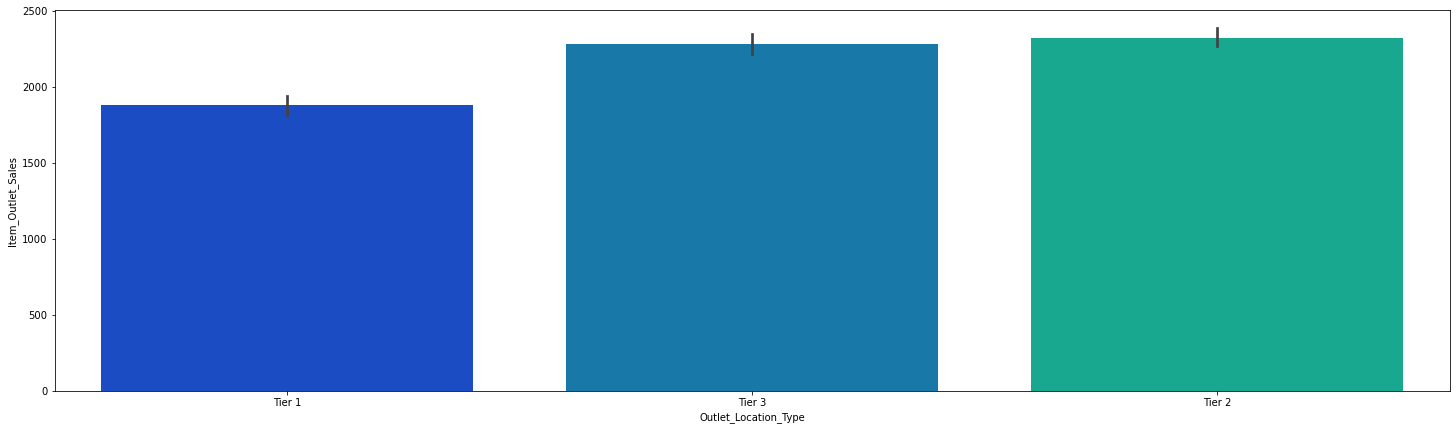

In [37]:
plt.figure(figsize=(25,7))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data, palette='winter')
plt.show()

* The Outlet Sales tend to be high for Tier3 and Tier 2 location types
* But we have maximum Outlets at only Tier3 locations.

### Outlet_Type

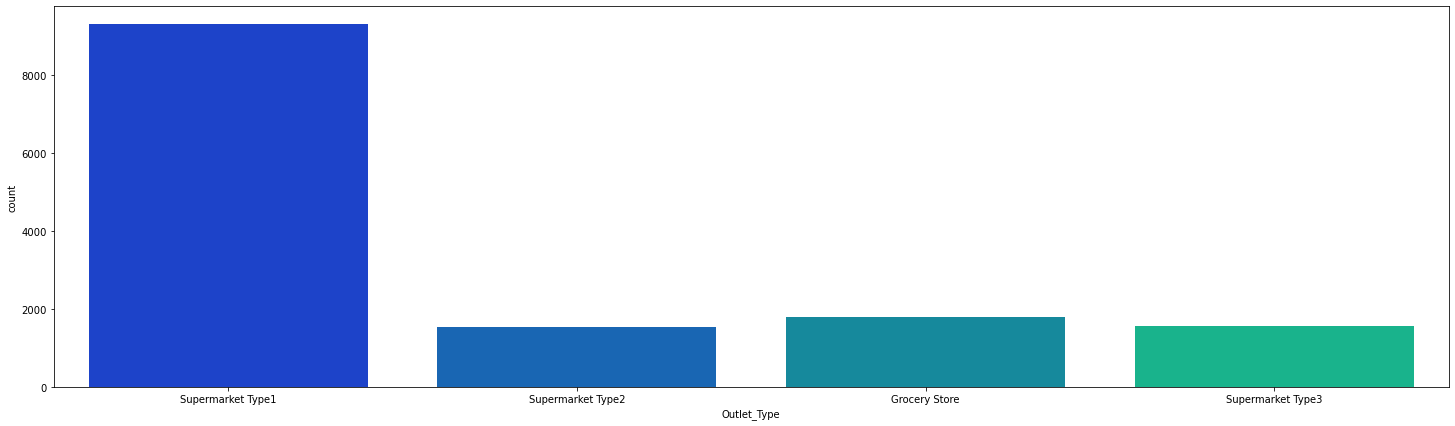

In [38]:
plt.figure(figsize=(25,7))
sns.countplot(x='Outlet_Type',data=data, palette='winter')
plt.show()

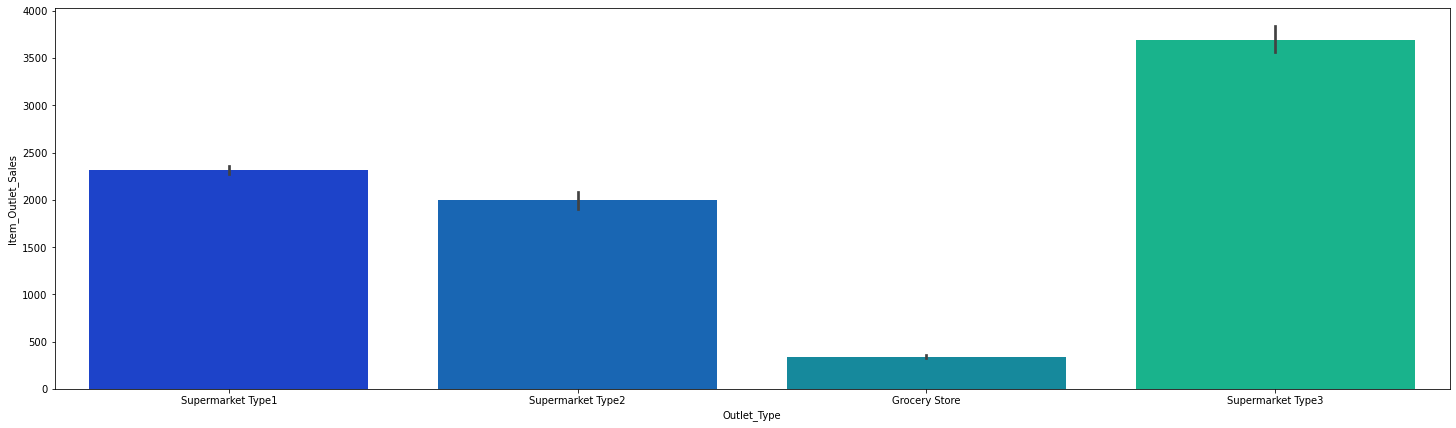

In [39]:
plt.figure(figsize=(25,7))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data, palette='winter')
plt.show()

* The Outlets are more of Supermarket Type1.
* But sales are more on Type 3

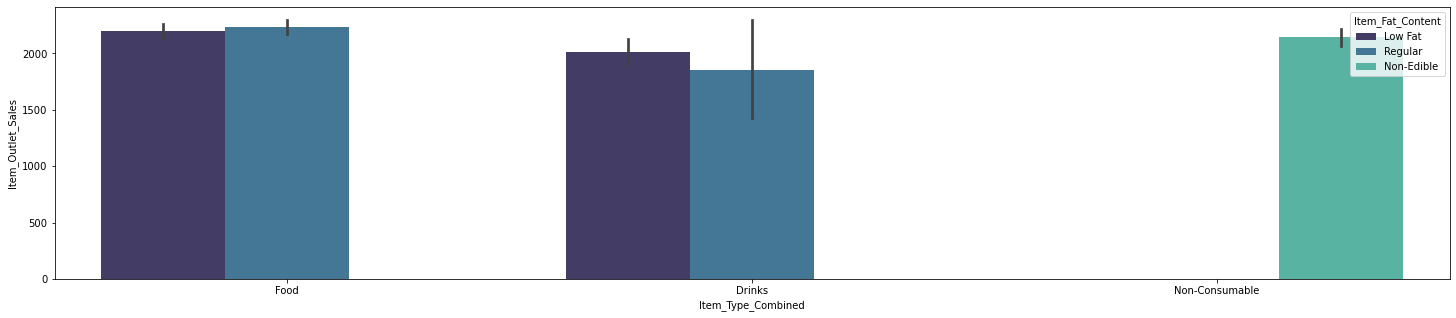

In [40]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type_Combined',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=data,palette='mako')
plt.show()

* For Foods their is almost equal distribution of Sales between Low Fat and Regular products.
* For Drinks Sales of Low FAT products are more.

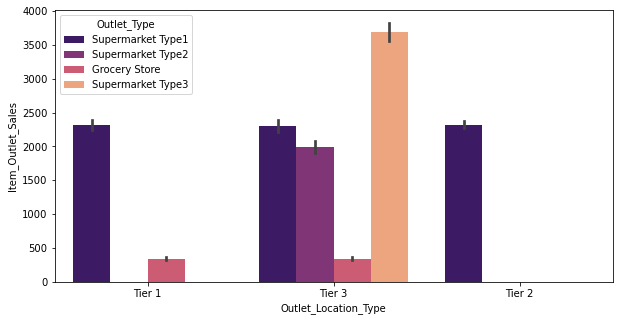

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.show()

* The Tier-3 location type has all types of Outlet type and has high sales margin.

## Numerical Features

In [42]:
#assigning numerical coulmn to variable
numerical_columns=list(data.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')

* As we have Outlet years , so Outlet_Establishment_Year column is irrelevant for us

### Item weight

Text(0.5, 0, 'Item weight')

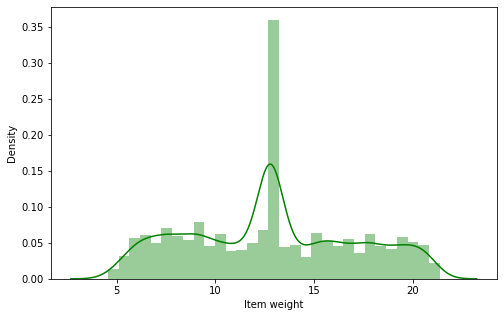

In [43]:
plt.figure(figsize=(8,5))
sns.distplot(x = data["Item_Weight"],color="g")
plt.xlabel("Item weight")

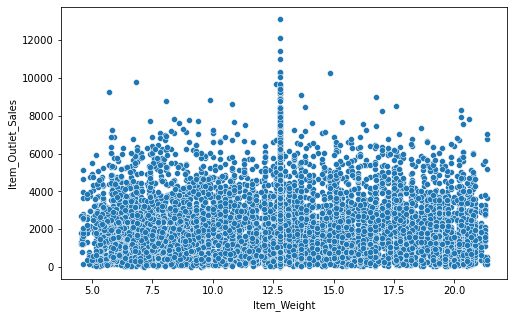

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=data)
plt.show()

* We have more products of weight around 12.5, and sell is maximum for that weight

### Item MRP

Text(0.5, 0, 'Item MRP')

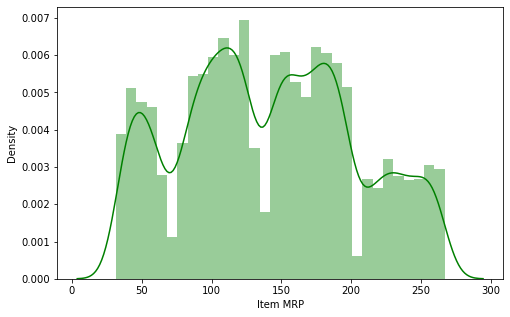

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(x = data["Item_MRP"],color="g")
plt.xlabel("Item MRP")

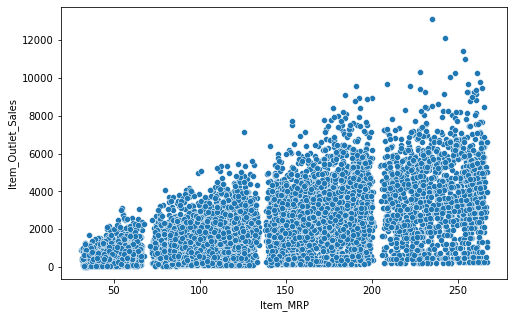

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)
plt.show()

* We have good amount of products for 50 MRP, 100 MRP ,180 MRP
* But MRP ranging from 200-250 dollars is having high Sales.

### Outlet Year

Text(0.5, 0, 'Outlet Years')

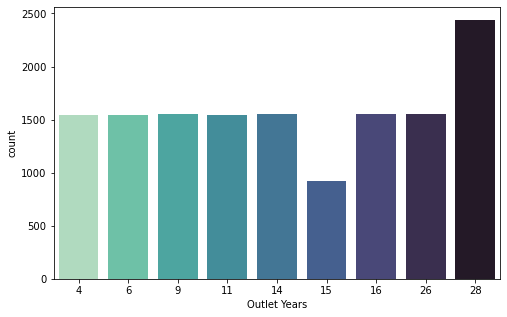

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Years',data=data,palette='mako_r')
plt.xlabel("Outlet Years")

<AxesSubplot:xlabel='Outlet_Years', ylabel='Item_Outlet_Sales'>

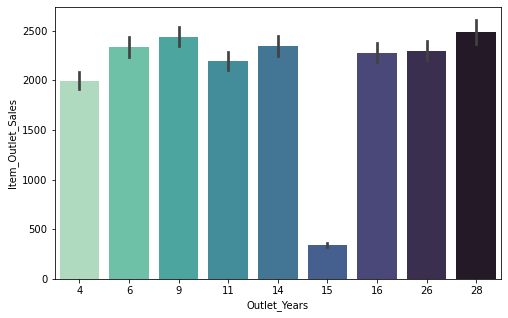

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Years',y='Item_Outlet_Sales',data=data,palette='mako_r')

* It is quiet evident that Outlets established 28 years before is having good Sales margin.
* We also have a outlet which was established before 15 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

### Item Visibility


Text(0.5, 0, 'Item Visibility')

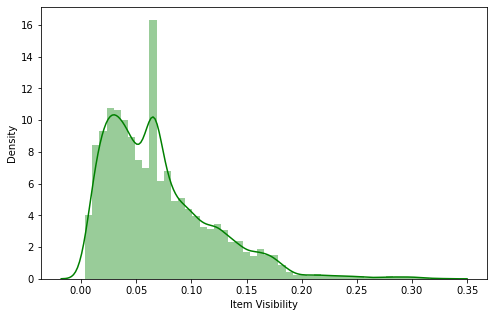

In [49]:
plt.figure(figsize=(8,5))
sns.distplot(x = data["Item_Visibility"],color="g")
plt.xlabel("Item Visibility")

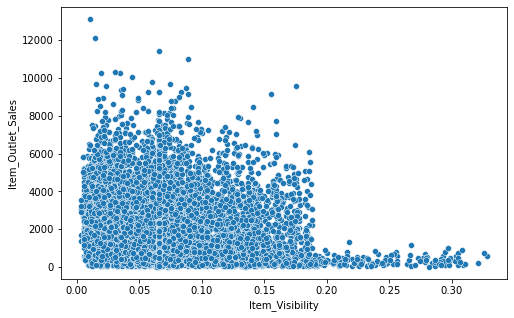

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=data)
plt.show()

* We have Items having Visibility 0 to 0.2 is more.
* And Items having Visibility around 0.05 is maximum.
* Sales is more for Items having Visibility 0 to 0.2
* Positive skewness

*  There is Skewness present in the Item_Visibility column we need to deal with it.

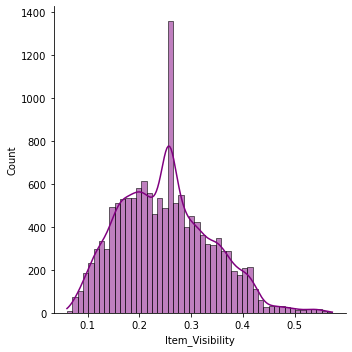

In [51]:
sns.displot(x=np.sqrt(data.Item_Visibility), color='purple', kde=True)
plt.show()

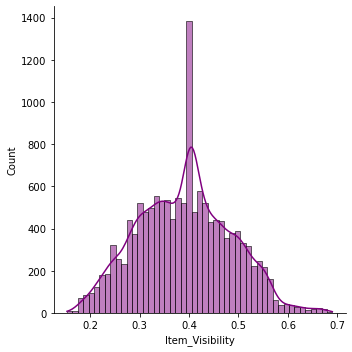

In [52]:
sns.displot(x=np.cbrt(data.Item_Visibility), color='purple', kde=True)
plt.show()

In [53]:
data["Item_Visibility"]  = np.cbrt(train['Item_Visibility'])

### Regression Plotting

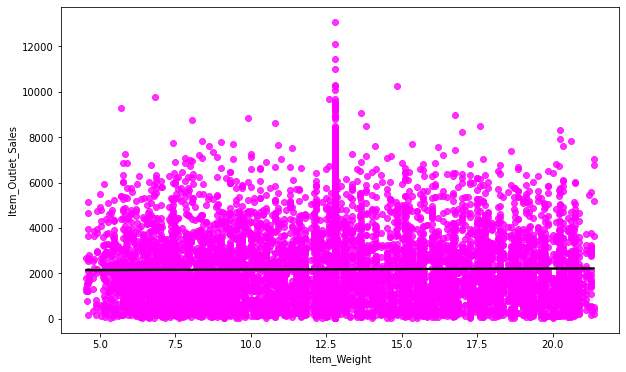

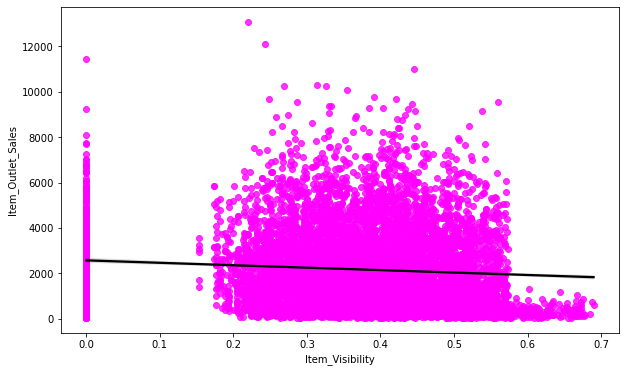

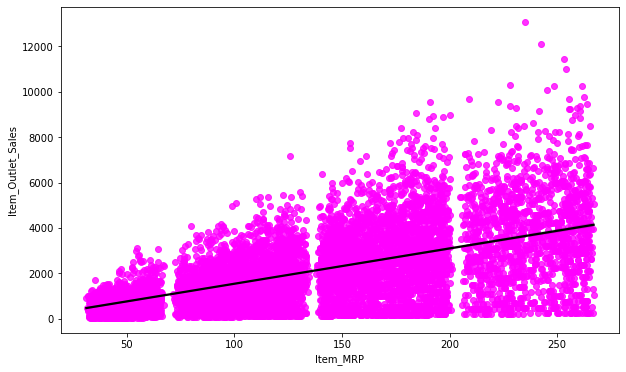

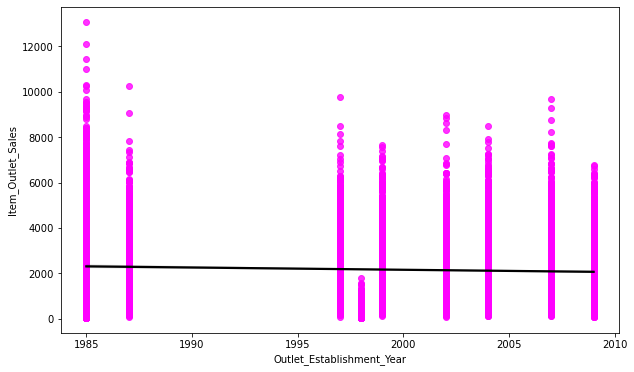

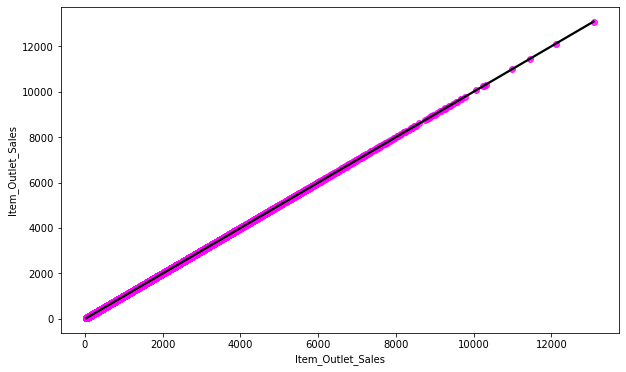

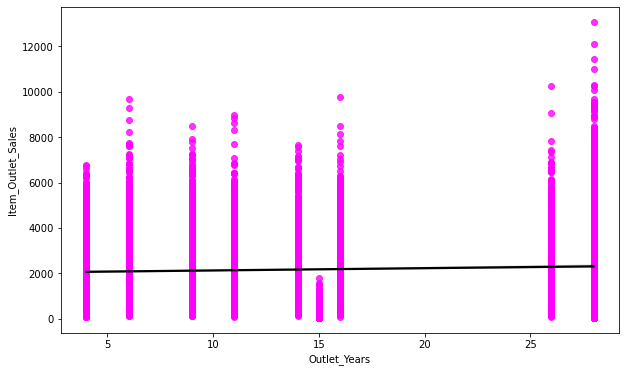

In [54]:
#plotting the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Item_Outlet_Sales'],scatter_kws={"color": 'magenta'}, line_kws={"color": "black"})

* From the above regression plot of all numerical features we can say that Item MRP have Positive correlation with the Item Outlet Sales , Increase in MRP of Product will increase the Sales.
* Item Visibility column  has slightly negative correlation with the Item Outlet Sales means Sales decreses with increase in visibility
* Outlet Years and Item weight have no correlation with the Item Outlet Sales.

### Distribution of the Item_Outlet_Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

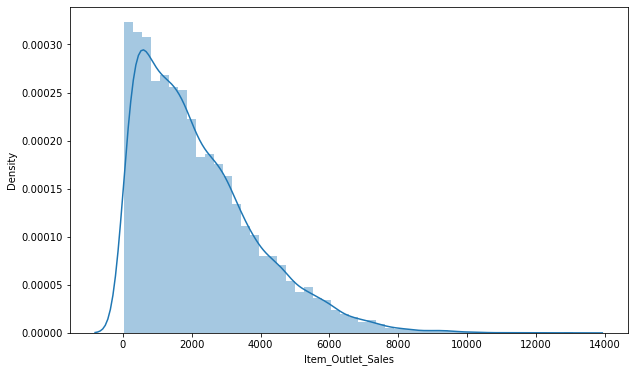

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(data['Item_Outlet_Sales'])

The above graph shows that Item Outlet Sales has right skewness. And we know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.

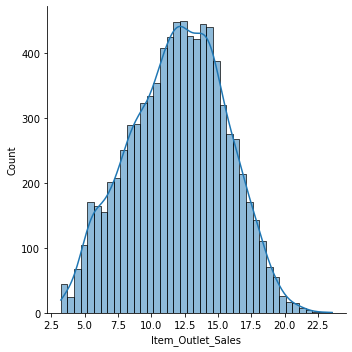

In [56]:
sns.displot(x=np.cbrt(data.Item_Outlet_Sales), kde=True)
plt.show()

After applying Cuberoot to the skewed Item_Outlet_Sales, we get almost normal distribution

# Corraltion Matrix

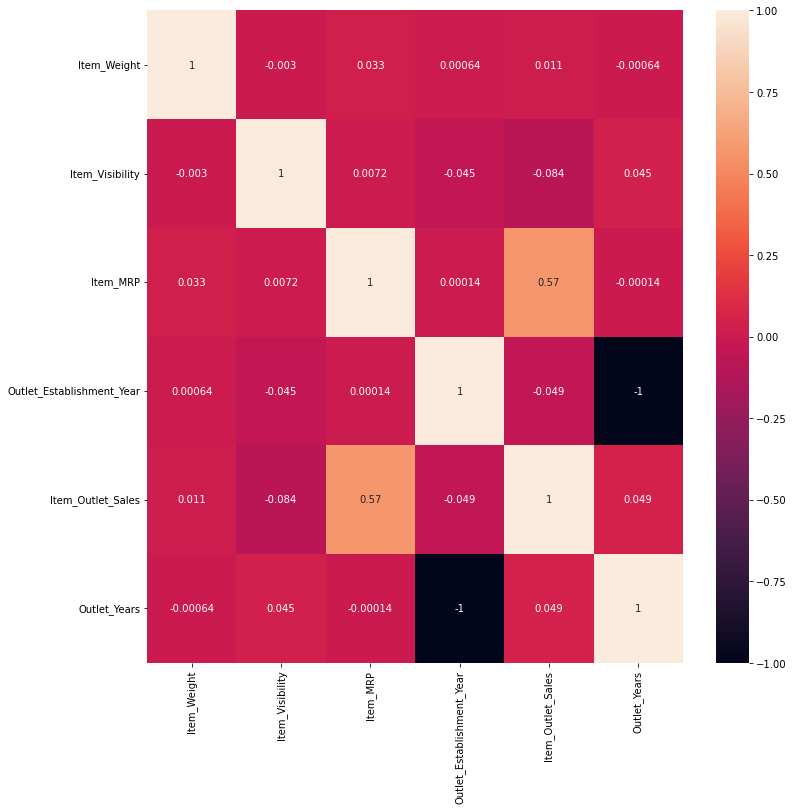

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr() , annot=True)
plt.show()

* We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.

# Encoding categorical variables

In [58]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [59]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [60]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Exporting data

In [61]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [62]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [63]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [64]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.252232,249.8092,OUT049,3735.1380,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.268136,48.2692,OUT018,443.4228,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.255913,141.6180,OUT049,2097.2700,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,15,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [65]:
# There are some columns that needs to be dropped as they don't seem helping our analysis

train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Years'],axis=1, inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Years'],axis=1, inplace=True)

In [66]:
X = train.drop(columns=["Item_Outlet_Sales"])        # Independent Variables
y = train.Item_Outlet_Sales 

There are some columns that needs to be dropped as they don't seem helping our analysis

# Feature Scaling

* Feature scaling is important for every algorithm where distance matter. Two famous techniques for Feature Scaling are:

1. Normalization
2. Standardization

Standardization is useful when the feature distribution is Normal or Gaussian, otherwise we do Normalization.

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### 1.  Item Weight

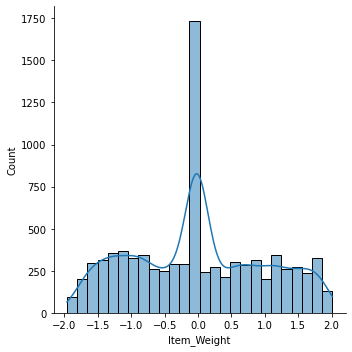

In [68]:
standard_Item_Weight = StandardScaler()
standard_Item_Weight.fit(X[['Item_Weight']])

X['Item_Weight'] =  standard_Item_Weight.transform(X[['Item_Weight']])
sns.displot(X.Item_Weight, kde=True)
plt.show()

In [69]:
test['Item_Weight'] = standard_Item_Weight.transform(test[['Item_Weight']])

### Item Visibility

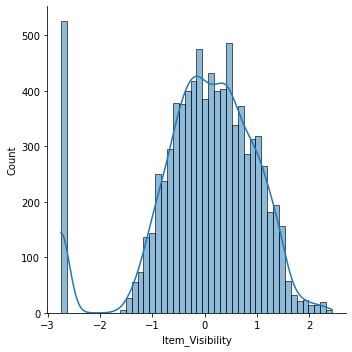

In [70]:
standard_Item_Visibility = StandardScaler()
X['Item_Visibility'] = standard_Item_Visibility.fit_transform(X[['Item_Visibility']])
sns.displot(X.Item_Visibility, kde=True)
plt.show()

In [71]:
test['Item_Visibility'] = standard_Item_Visibility.transform(test[['Item_Visibility']])

# Item MRP

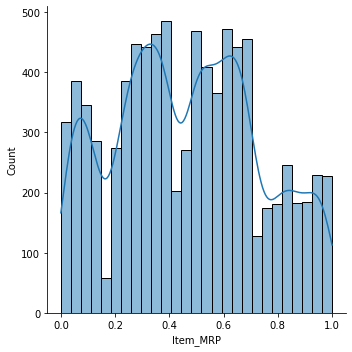

In [72]:
normal_Item_MRP = MinMaxScaler()
X['Item_MRP'] = normal_Item_MRP.fit_transform(X[['Item_MRP']])
sns.displot(X.Item_MRP, kde=True)
plt.show()

In [73]:
test['Item_MRP'] = normal_Item_MRP.transform(test[['Item_MRP']])

In [74]:
# Verifying the changes in the dataset

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.252232,249.8092,3735.1380,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,5.92,0.268136,48.2692,443.4228,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0.255913,141.6180,2097.2700,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,732.3800,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [75]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,1.870339,NaN,0.325012,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8524,-1.075742,NaN,0.237819,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8525,0.415046,NaN,0.893316,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8526,-1.308825,NaN,0.525233,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8527,-0.013259,NaN,0.861381,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


## Creating test and train data


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
print(X_train.shape)
print(X_test.shape)

(5966, 29)
(2557, 29)


# Implementing Linear regression

In [78]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [79]:
#checking the score
reg.score(X_train, y_train)

0.5602515366519211

In [80]:
#checking the coefficeint
reg.coef_

array([-7.88205943e+00, -3.27186192e+01,  3.72051525e+03, -3.67629703e+01,
       -1.83730634e+00,  3.86002767e+01, -9.20446200e+01,  2.03101152e+01,
        7.17345048e+01,  1.89689031e+00,  6.52074688e+01, -6.71043591e+01,
       -1.06647011e+03,  3.10265816e+02, -4.62649911e+01,  8.02469290e+02,
       -1.10185829e+01,  1.28558893e+01, -1.83730634e+00, -6.86366684e+02,
        1.89689031e+00,  3.86996842e+00, -4.62649911e+01, -3.80103431e+02,
        8.02469290e+02,  1.66602733e+02, -1.50162586e+02,  1.46396339e+02,
        1.41662472e+02])

In [81]:
#getting the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [82]:
#importing package
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1300527.3326489313
RMSE : 1140.4066523170281
MAE : 848.4894870062984
R2 : 0.5602515366519211
Adjusted R2 : 0.5552049575315829


Here r2 score value is 0.56 that means our model is  not able to capture most of the data variance.

In [83]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [84]:
#importing package
from sklearn.metrics import mean_squared_error

#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2)

MSE : 1206178.3354780895
RMSE : 1098.261505962077
MAE : 809.6781502782885
R2 : 0.5693748222923162
Adjusted R2 : 0.564432942532315


The r2_score for the test set is 0.78, it means that our linear model is performing well on the data.

In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

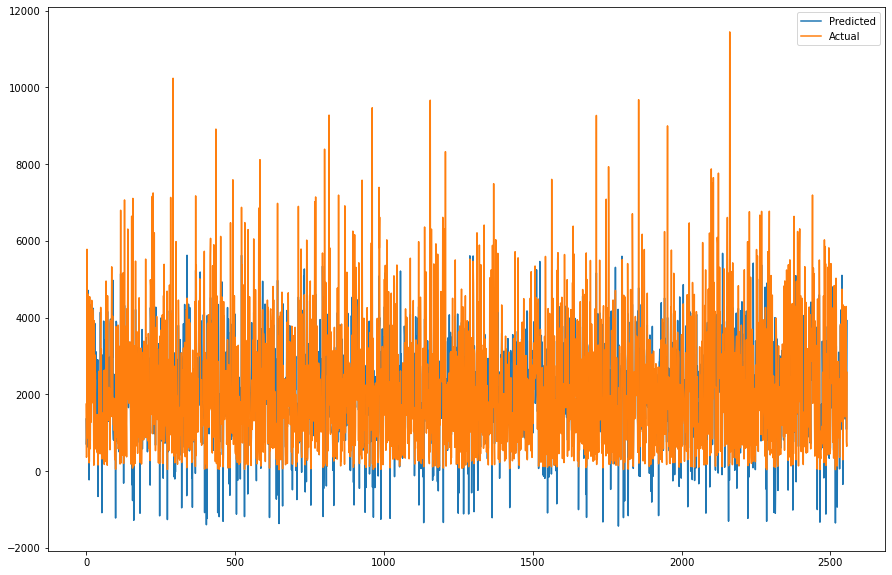

In [86]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

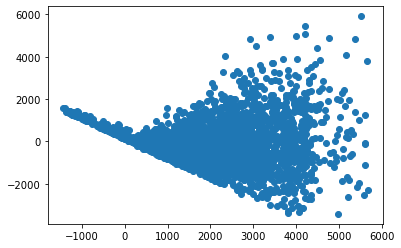

In [87]:
#Checking Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# Implementing Lasso regression

In [88]:
#Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.5695533478152395
0.5602160667362148


In [89]:
#getting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1300632.2326058554
RMSE : 1140.4526437366242
MAE : 848.1304395859287
R2 : 0.5602160667362148
Adjusted R2 : 0.5551690805610467


Here r2 score is 0.56 so it means that our model is not able to capture most of the data variance.

In [90]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [91]:
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1205678.2866439123
RMSE : 1098.033827640985
MAE : 809.3392076546573
R2 : 0.5695533478152395
Adjusted R2 : 0.5646135168245952


The r2_score for the test set is 0.57 it means that our linear model is not performing well on the data.

In [92]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

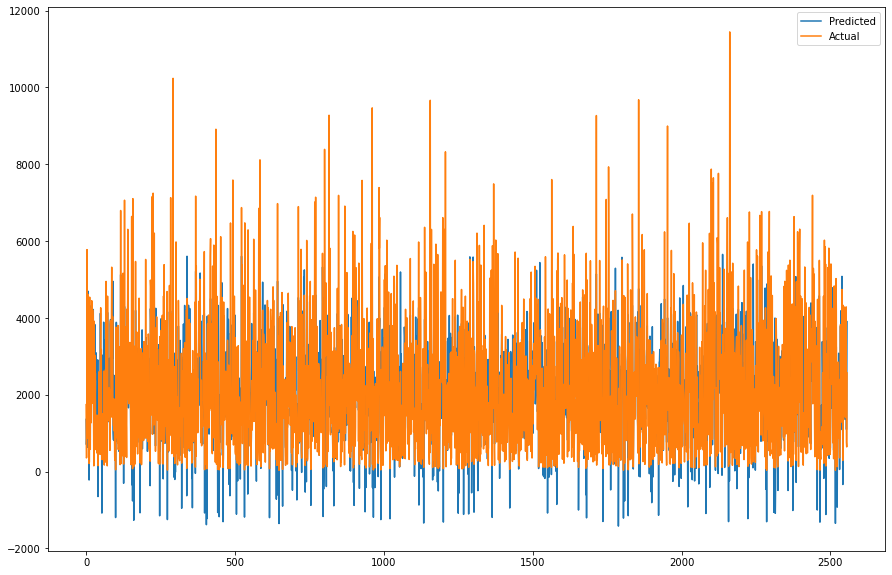

In [93]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

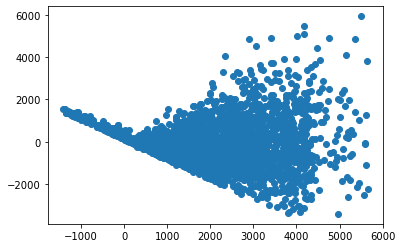

In [94]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# Implementing Ridge Regression¶

In [95]:
#importing package
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [96]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [97]:
#checking score
ridge.score(X_train, y_train)

0.5602515162423304

In [98]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [99]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1300527.3930089616
RMSE : 1140.4066787812853
MAE : 848.4844827004916
R2 : 0.5602515162423304
Adjusted R2 : 0.5552049368877706


Here r2 score is 0.56 so it means that our model is not able to capture most of the data variance.

In [100]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [101]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1206154.9322070284
RMSE : 1098.2508512207164
MAE : 809.6657144580239
R2 : 0.5693831776386717
Adjusted R2 : 0.5644413937651147


Here the r2_score for the test set is 0.57 it means that our linear model is not performing well on the data.

In [102]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

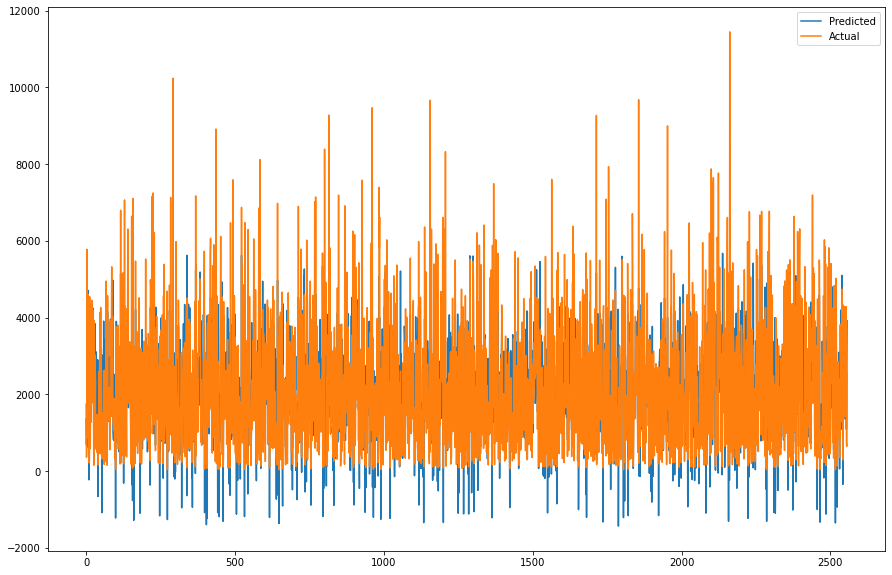

In [103]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

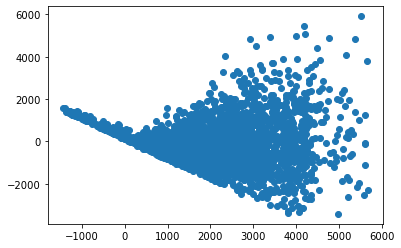

In [104]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

In [105]:
#importing package
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [106]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [107]:
#checking score
elasticnet.score(X_train, y_train)

0.4943957611595404

In [108]:
#getting X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [109]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1495291.4834740348
RMSE : 1222.8211167108764
MAE : 910.124959664029
R2 : 0.4943957611595404
Adjusted R2 : 0.4885934173026455


Here r2 score value is 0.50 it means that our model is not able to capture most of the data variance.

In [110]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [111]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1360447.2750249757
RMSE : 1166.3821307894664
MAE : 865.1748578328691
R2 : 0.5142983153172325
Adjusted R2 : 0.5087243743374935


Here r2_score for the test set is 0.52 it means that our linear model is performing well on the data.

In [112]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

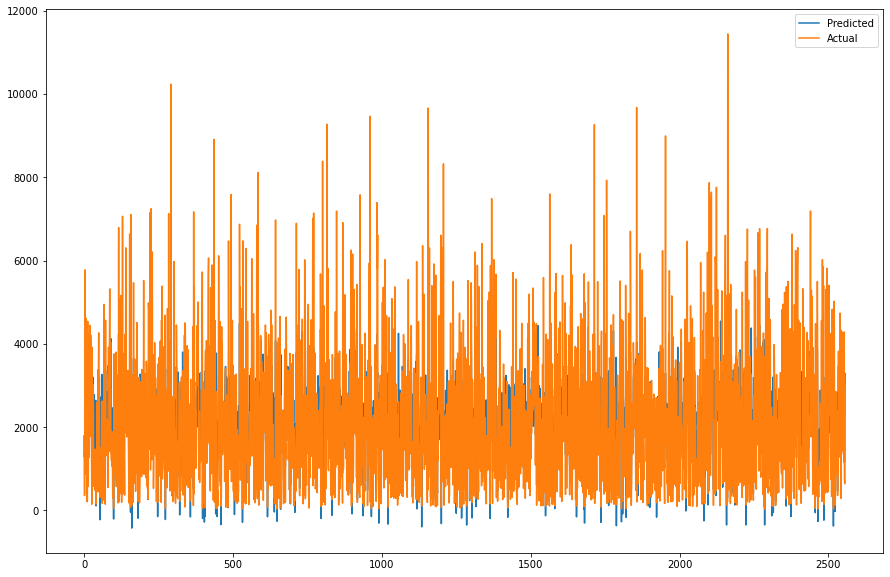

In [113]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

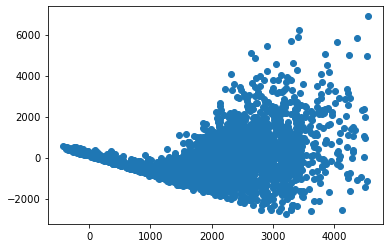

In [114]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# Implementing Decision Tree Regression¶

In [115]:
#importing package
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [116]:
#getting the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [117]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE)


#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_d)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.6155245328973165
MSE : 1137061.0596181161
RMSE : 1066.3306521047382
MAE : 750.5739078608659
R2 : 0.6155245328973165
Adjusted R2 : 0.6111122699190902


Here r2 score value is 0.59 it means that our model is able to capture most of the data variance.

In [118]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [119]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1191188.3433605775
RMSE : 1091.4157518382156
MAE : 757.7697909200843
R2 : 0.5747264919663382
Adjusted R2 : 0.5698460282809499


The r2_score for the test set is 0.60 it means that our linear model is performing well on the data.

In [120]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

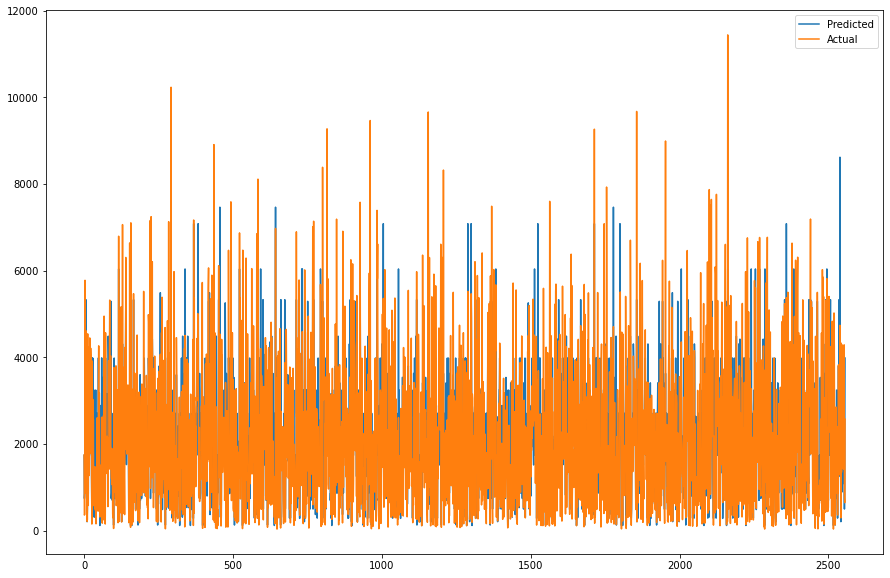

In [121]:
#Ploting figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

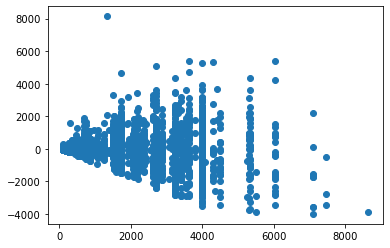

In [122]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# Implementing Random Forest Regression

In [123]:
#importing package
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [124]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [125]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE)


#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_r)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9374820046376691
MSE : 184892.88429138472
RMSE : 429.9917258406081
MAE : 298.8982490864901
R2 : 0.9374820046376691
Adjusted R2 : 0.93676454446137


Here r2 score value is 0.94 it means that our model is able to capture most of the data variance.

In [126]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [127]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1248537.3996996135
RMSE : 1117.3797025629262
MAE : 779.1884922510754
R2 : 0.5542519511368705
Adjusted R2 : 0.5491365204217812


The r2_score for the test set is 0.56 it means that our linear model is performing well on the data.

In [128]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [129]:
rf_model.feature_importances_

array([6.45525297e-02, 1.14942631e-01, 4.61371906e-01, 8.85107796e-03,
       3.32426099e-03, 7.74330719e-03, 3.98757725e-03, 4.36991792e-03,
       3.26244083e-03, 2.73737391e-03, 4.50415810e-03, 4.18774570e-03,
       1.92773273e-01, 2.62278820e-03, 1.96308338e-03, 3.83039436e-02,
       5.59931782e-03, 5.49752489e-03, 3.28950571e-03, 1.36684961e-05,
       2.62074806e-03, 6.41896991e-03, 1.89295253e-03, 1.26331656e-05,
       3.56858227e-02, 5.02740362e-03, 5.52333351e-03, 3.82346876e-03,
       5.09663550e-03])

In [130]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

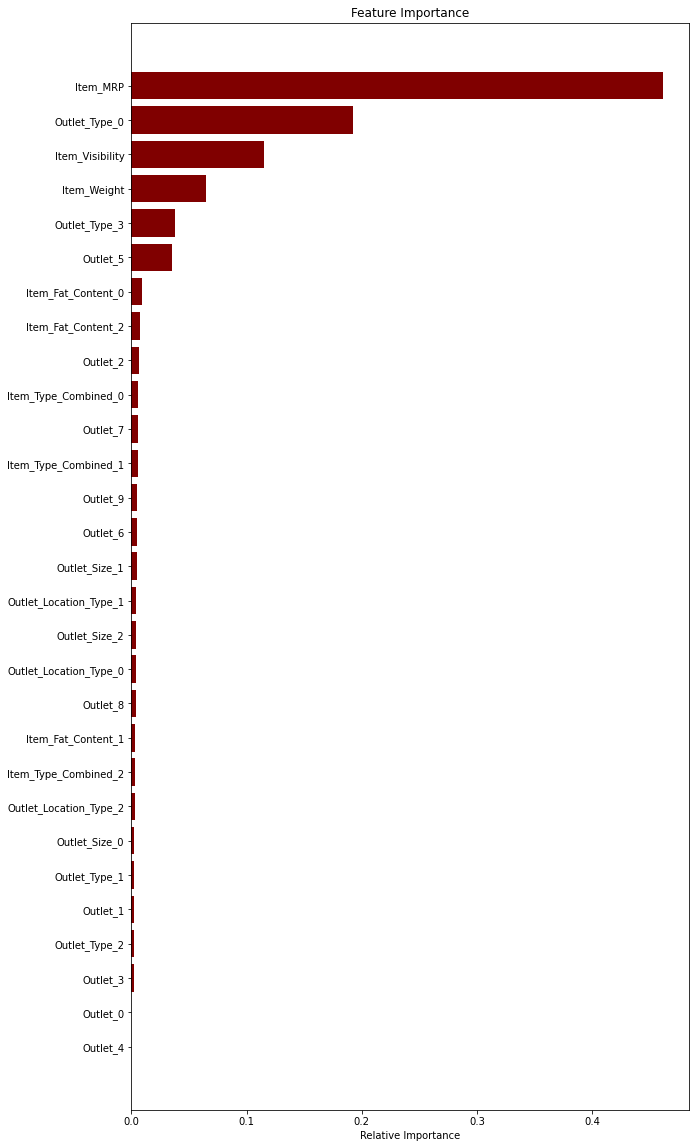

In [131]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Implementing Gradient Boosting Regression

In [132]:
#importing package
from sklearn.ensemble import GradientBoostingRegressor
# Creating an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [133]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [134]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_g)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.6405910849732843
MSE : 1062928.3705306728
RMSE : 1030.9841756936296
MAE : 729.7961181568822
R2 : 0.6405910849732843
Adjusted R2 : 0.6364664872147664


Here r2 score value is 0.64 it means that our model is able to capture most of the data variance.

In [135]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [136]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1062928.3705306728
RMSE : 1030.9841756936296
MAE : 742.0392426559187
R2 : 0.5939467766890417
Adjusted R2 : 0.5892868861168146


The r2_score for the test set is 0.60 it means that our linear model is performing well on the data

In [137]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [138]:
gb_model.feature_importances_

array([7.11843959e-03, 8.33731921e-03, 5.42273958e-01, 6.41659790e-04,
       5.17686444e-06, 1.99351007e-04, 1.91840652e-04, 2.34902557e-05,
       4.86356498e-05, 8.53324132e-04, 1.74985982e-04, 1.28075671e-04,
       2.94399703e-01, 1.21773771e-02, 5.55432157e-04, 6.25704628e-02,
       0.00000000e+00, 1.22823977e-05, 0.00000000e+00, 0.00000000e+00,
       1.06008957e-03, 4.92322377e-04, 1.99254185e-05, 0.00000000e+00,
       6.42359924e-02, 1.49394289e-03, 1.18440840e-03, 6.35622736e-04,
       1.16618264e-03])

In [139]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [140]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

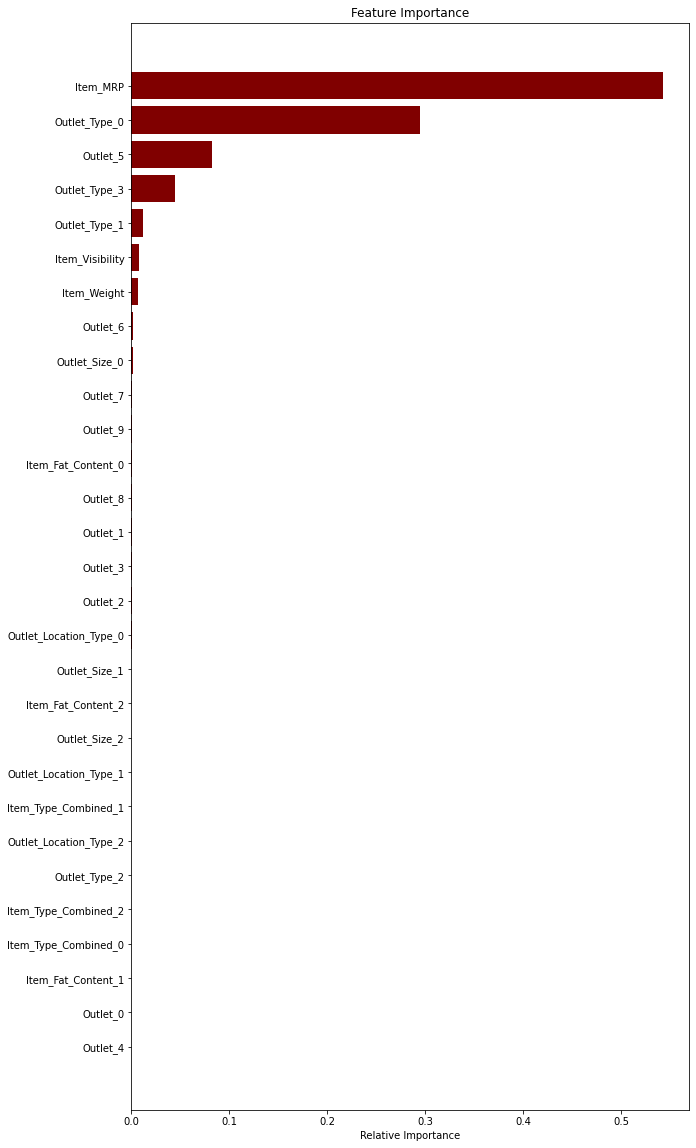

In [141]:
#Ploting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Hyperparameter tuning

# Now, let us try to tune some hyperparameters and see if the performance of our model improves.

# Gradient Boosting Regressor with GridSearchCV

In [142]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [143]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [144]:
#importing package
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_sam

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=10

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [145]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=4, min_samples_leaf=50,
                          min_samples_split=150, n_estimators=50)

In [146]:
gb_optimal_model = gb_grid.best_estimator_

In [147]:
gb_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 50}

In [148]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [149]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.6256467970809358
MSE : 1107125.1250184537
RMSE : 1052.200135439287
MAE : 740.6199044297673
R2 : 0.6256467970809358
Adjusted R2 : 0.6213506977993162


In [150]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [151]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1111942.1571847398
RMSE : 1054.4866794724055
MAE : 736.9036673529603
R2 : 0.6030186623700622
Adjusted R2 : 0.5984628812892279


In [152]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [153]:
gb_optimal_model.feature_importances_

array([4.67324692e-03, 7.84318945e-03, 5.42755600e-01, 6.50662484e-04,
       1.35937259e-04, 3.09414248e-04, 0.00000000e+00, 2.57983809e-04,
       1.96790792e-06, 1.34731422e-04, 0.00000000e+00, 3.03816049e-06,
       3.10941591e-01, 3.85893818e-03, 2.74999283e-03, 4.19728869e-02,
       0.00000000e+00, 8.47335185e-06, 0.00000000e+00, 0.00000000e+00,
       2.69482590e-04, 0.00000000e+00, 1.73619965e-03, 0.00000000e+00,
       7.96372839e-02, 1.71114375e-04, 1.13592097e-03, 4.85688996e-04,
       2.66655712e-04])

In [154]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [155]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

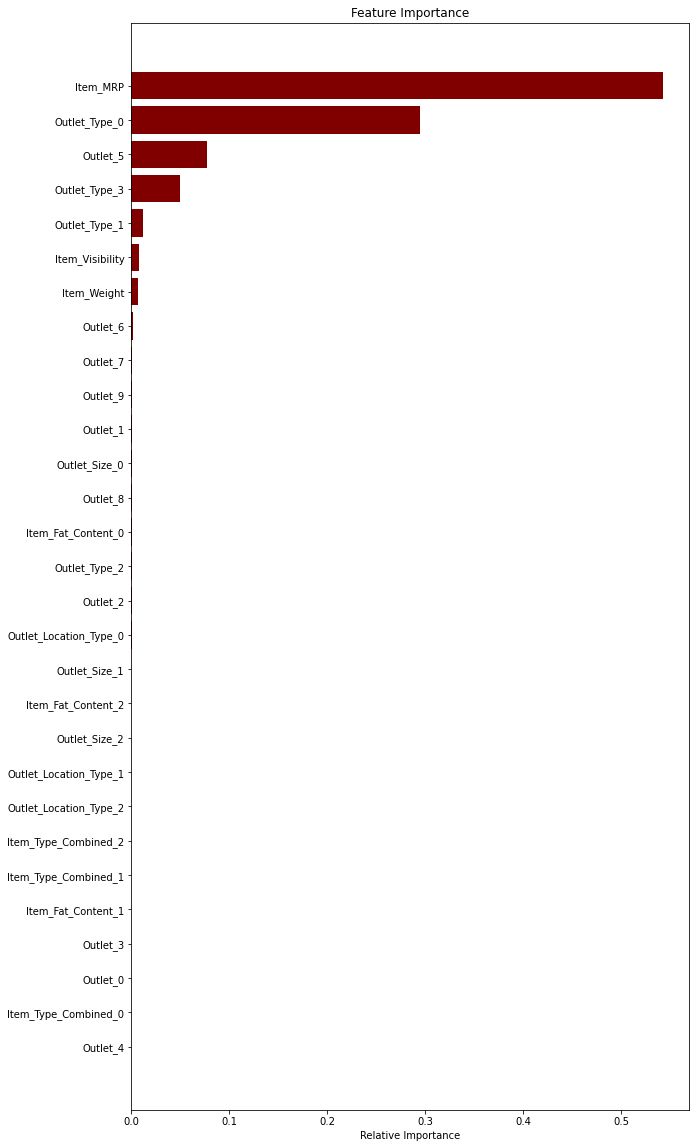

In [156]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Random Forest Regressor with Hyperparameter Tuning

In [157]:
print("Parameters currently in use:\n")
print(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Random Search with Cross Validation

In [158]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [159]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [160]:
# Fit the random search model
rf_random.fit(X_train,y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [161]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [162]:
rf_random_best = rf_random.best_estimator_

In [163]:
# Making predictions on train and test data

y_pred_train_r_f  = rf_random_best.predict(X_train)
y_pred_r_f = rf_random_best.predict(X_test)

In [164]:
print("Model Score:",rf_random_best.score(X_train,y_train))
MSE_rfh= mean_squared_error(y_train, y_pred_train_r_f)
print("MSE :",MSE_rfh)

RMSE_rfh=np.sqrt(MSE_rfh)
print("RMSE :",RMSE_rfh)


MAE_rfh= mean_absolute_error(y_train, y_pred_train_r_f)
print("MAE :",MAE_rfh)


r2_rfh= r2_score(y_train, y_pred_train_r_f)
print("R2 :",r2_rfh)
Adjusted_R2_rfh = (1-(1-r2_score(y_train, y_pred_train_r_f))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_f))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.7069427180763476
MSE : 866697.7532377058
RMSE : 930.9660322684742
MAE : 653.3473674948698
R2 : 0.7069427180763476
Adjusted R2 : 0.7035795755453678


In [168]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random Forest gridsearchcv ',
       'MAE':round((MAE_rfh),3),
       'MSE':round((MSE_rfh),3),
       'RMSE':round((RMSE_rfh),3),
       'R2_score':round((r2_rfh),3),
       'Adjusted R2':round((Adjusted_R2_rfh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

# CONCLUSION
## In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Item_Outlet_Sales'and also transformed it. Next we analysed categorical variable and performed feature engineering on some column dropped off the irrelevant ones. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features and hot encoded the categorical variables.
## Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and GBoost. We did hyperparameter tuning to improve our model performance. Following are the results of our evaluation:

In [169]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model      MAE          MSE  \
Training set 0               Linear regression   848.489  1300527.333   
             1                Lasso regression   848.130  1300632.233   
             2                Ridge regression   848.484  1300527.393   
             3          Elastic net regression   910.125  1495291.483   
             4        Dicision tree regression   750.574  1137061.060   
             5        Random forest regression   298.898   184892.884   
             6    Gradient boosting regression   729.796  1062928.371   
             7  Gradient Boosting gridsearchcv   740.620  1107125.125   
Test set     0               Linear regression   809.678  1206178.335   
             1                Lasso regression   809.339  1205678.287   
             2                Ridge regression   809.666  1206154.932   
             3      Elastic net regression Test  865.175  1360447.275   
             4        Dicision tree regression   757.770  1191188.343   
             5        Random forest regression   779.188  1248537.400   
             6    Gradient boosting regression   742.039  1062928.371   
             7  Gradient Boosting gridsearchcv   736.904  1111942.157   
             8  Gradient Boosting gridsearchcv   653.347   866697.753   
             9      Random Forest gridsearchcv   653.347   866697.753   

                    RMSE  R2_score  Adjusted R2  
Training set 0  1140.407     0.560         0.56  
             1  1140.453     0.560         0.56  
             2  1140.407     0.560         0.56  
             3  1222.821     0.494         0.49  
             4  1066.331     0.616         0.61  
             5   429.992     0.937         0.94  
             6  1030.984     0.641         0.64  
             7  1052.200     0.626         0.62  
Test set     0  1098.262     0.569         0.56  
             1  1098.034     0.570         0.56  
             2  1098.251     0.569         0.56  
             3  1166.382     0.514         0.51  
             4  1091.416     0.575         0.57  
             5  1117.380     0.554         0.55  
             6  1030.984     0.594         0.59  
             7  1054.487     0.603         0.60  
             8   930.966     0.707         0.70  
             9   930.966     0.707         0.70

* overfitting is seen for random forest regression.

*  Random forest Regressor gives the highest R2 score of 94% for Train Set and Gradient Boosting gridsearchcv gives the highest R2 score of 70% for Test set,which is decent.

*  We can deploy this model.